<a href="https://colab.research.google.com/github/sayan0506/Anomaly-Detection-Using-LSTM-Autoencoder/blob/main/Cynlr_3_all_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cylindrical Bearings Ring Counts 

In [5]:
!pip install skimage

ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [7]:
from matplotlib import pyplot as plt 
from pathlib import Path
import os
import matplotlib.image as mpimg
import cv2
import numpy as np
import sys
import PIL
from PIL import Image
from google.colab.patches import cv2_imshow
import math
import skimage.filters.thres#import cv2_imshow

**Image storing**

Image file path in drive "**/content/drive/MyDrive/Cylindrical Bearings**"

In [2]:
def images_list(good_image_path, bad_image_path):
  paths_good = sorted(Path(good_image_path).iterdir())
  paths_bad = sorted(Path(bad_image_path).iterdir())
  good_images = {}
  bad_images = {}
  print(paths_good)
  for i, imagename in enumerate(paths_good):
    if str(imagename).find('png') == -1 and str(imagename).find('jpeg') == -1 and str(imagename).find('bmp') == -1:
      continue
    else:
      #print(imagename)
      #print(sorted(os.listdir(good_image_path)))
      good_images[sorted(os.listdir(good_image_path))[i]] = mpimg.imread(imagename)
      #good_images[set(imagename.split(paths_good)).difference(set(paths_good.split(paths_good))]
  for i,imagename in enumerate(paths_bad):
    if str(imagename).find('png') == -1 and str(imagename).find('jpeg') == -1 and str(imagename).find('bmp') == -1:
      continue
    else:
      #print(imagename)  
      bad_images[sorted(os.listdir(bad_image_path))[i]] = mpimg.imread(imagename)
  print(f'Good image names: {good_images.keys()}')
  print(f'Bad image names: {bad_images.keys()}')
  
  # returns both image dictionary
  return good_images, bad_images


**Generating image dictionary**

In [3]:
good_image_path = '/content/drive/MyDrive/Cylindrical Bearings/Good' 
bad_image_path = '/content/drive/MyDrive/Cylindrical Bearings/Bad' 

good_images, bad_images = images_list(good_image_path, bad_image_path)

[PosixPath('/content/drive/MyDrive/Cylindrical Bearings/Good/1.png'), PosixPath('/content/drive/MyDrive/Cylindrical Bearings/Good/2.png'), PosixPath('/content/drive/MyDrive/Cylindrical Bearings/Good/3.png')]
Good image names: dict_keys(['1.png', '2.png', '3.png'])
Bad image names: dict_keys(['1.png', '2.png', '3.bmp'])


In [4]:
# in image visualization we pass the figure_title, image dictionary
# image count is the total images we want to visualize 
# assuming max 5 images in a row
# enter number of columns
# Consider each row consist equal number of images
# for dynamic row and column work later

def image_visualization(fig_title, image_dict, row, column, image_count):
  row = row
  col = column
  fig = plt.figure(figsize = (30,8))
  fig.suptitle(fig_title, fontsize = 24)
  for i,imagename in enumerate(image_dict.keys()):
    #print(image_dir[imagename].shape)
    fig.add_subplot(row, col, i+1)
    plt.imshow(image_dict[imagename], cmap = 'binary')
    plt.axis('off')
  plt.show()



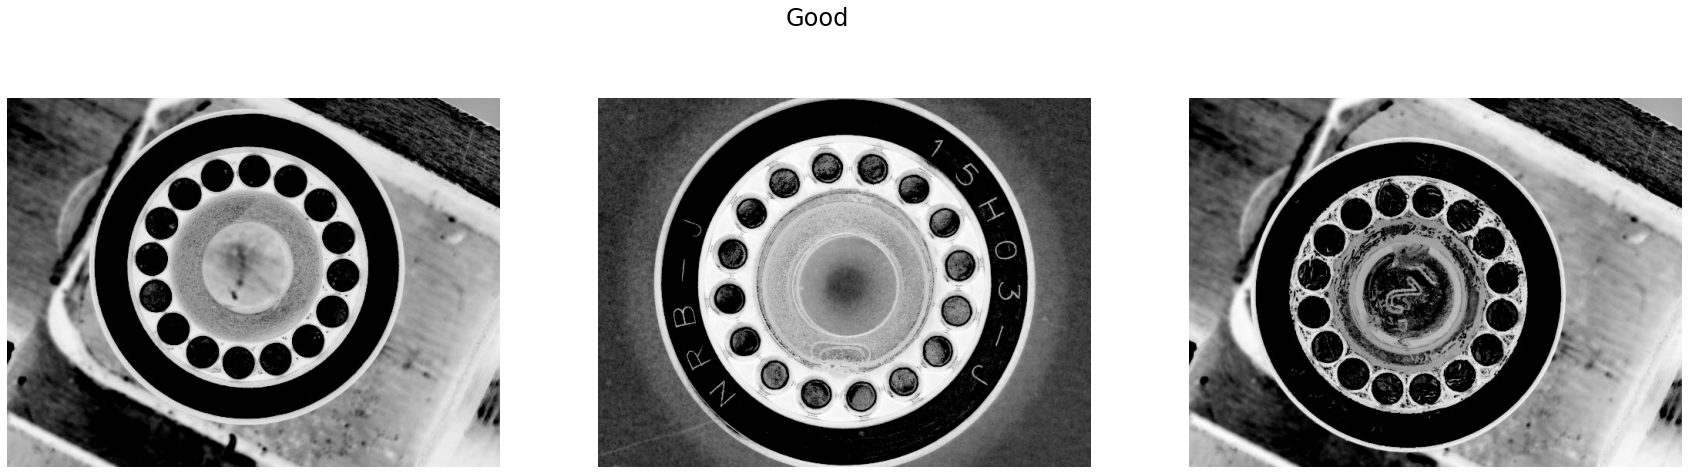

In [5]:
# good image visualization
fig_title = 'Good'
image_dict = good_images
row = 1
column = 3
image_count = 3
image_visualization(fig_title, image_dict, row, column, image_count)

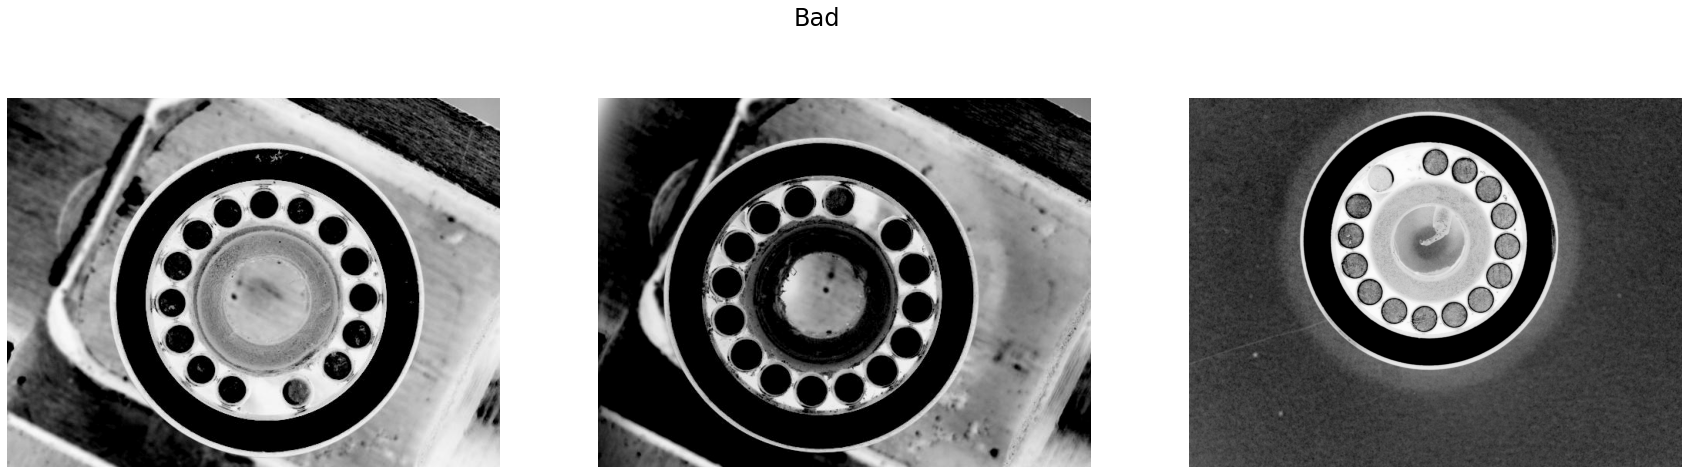

In [ ]:
# good image visualization
fig_title = 'Bad'
image_dict = bad_images
row = 1
column = 3
image_count = 3
image_visualization(fig_title, image_dict, row, column, image_count)

In [ ]:
th, im_th = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
cv2_imshow(im_th)
#edges = cv2.Canny(im_th, 100, 200)
#cv2_imshow(edges)
plt.imsave('new.png', im_th)

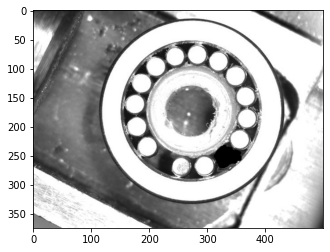

In [319]:
img = Image.open('/content/2_test_2.png')
#plt.imshow(img)
mywidth = 500
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
img = np.array(img)/255.
plt.imshow(img, cmap = 'gray')
#print(img.shape)
plt.imsave('resized.jpg', img)
img = cv2.imread('resized.jpg')
#cv2_imshow(img)

In [320]:

#img = bad_images[1]
#img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = img.astype('uint8')
#img = cv2.resize()
print(img.shape)


(375, 500)


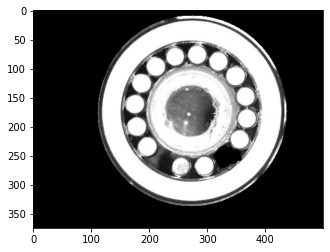

In [321]:
#img = cv2.imread('circles1.png',0)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
# Specify different radii
radii = np.arange(10,310,10)
# Create mask
height,width = img.shape
mask = np.zeros((height,width), np.uint8)
masked_data = []

# For each pair of radii...
for idx in range(len(radii)-1):
    # Get the minimum and maximum radius
    # Note you need to add 1 to each minimum
    # as the maximum of the previous pair covers this new minimum
    minRadius = radii[idx]+1
    maxRadius = radii[idx+1]

    # Hough Transform - Change here
    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,5,
                               param1=25,param2=75,minRadius=minRadius,maxRadius=maxRadius)

    # Skip if no circles are detected - Change here
    if circles is None:
        #print('yes')
        continue

    circles = np.uint16(np.around(circles))
    #print(len(circles[0.:]))
    # Go over circles, eliminating the ones that are not cocentric enough
    #height, width = img.shape
    #center = (width/2,height/2)
    for i in circles[0,:]:
        i[2]=i[2]+4
        # draw the outer circle
        cv2.circle(mask,(i[0],i[1]),i[2],(255,255,255),thickness=-1)
        #if math.sqrt((center[0]-i[0])**2 + (center[1]-i[1])**2) < 15:
        #cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),1)
            # draw the center of the circle
        #cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    masked_data = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(masked_data, cmap = 'gray')

#cv2.imshow('detected circles',cimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

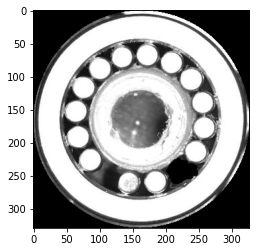

In [322]:
# Apply Threshold
_,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)

# Find Contour
contours,_ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#print(contours)
x,y,w,h = cv2.boundingRect(contours[0])

# Crop masked_data
crop = masked_data[y:y+h,x:x+w]
plt.imshow(crop, cmap = 'gray')

In [323]:
plt.imsave('new.jpg',crop)

In [324]:
img = Image.open('new.jpg')
mywidth = 380
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
img = np.array(img)
#print(img.shape)
plt.imsave('resized.jpg', img)
img = cv2.imread('resized.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

Circle count: 14


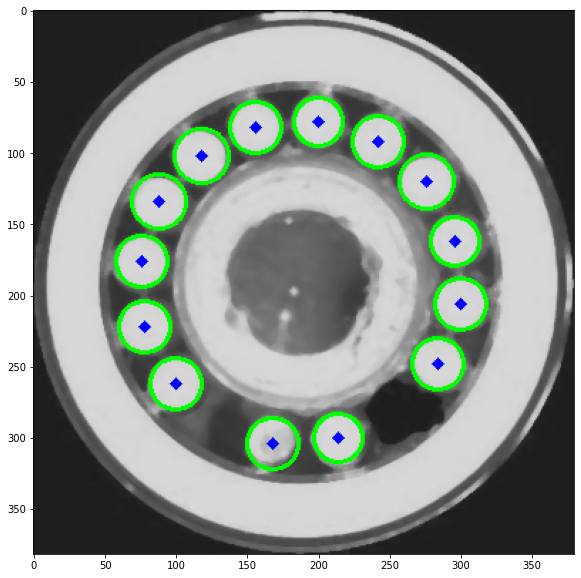

In [325]:
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img, (7,7), sigmaX = -1, sigmaY = -1)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
#edges = cv2.Canny(img,20,80,apertureSize = 3)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1= 50,param2=30,minRadius=5,maxRadius=25)

circles = np.uint16(np.around(circles))
print(f'Circle count: {len(circles[0,:])}')
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

fig = plt.figure(figsize=(10,10))
plt.imshow(cimg)

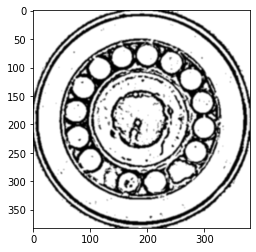

In [326]:
im_th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
img = cv2.GaussianBlur(im_th, (5,5), sigmaX = -1, sigmaY = -1)
plt.imshow(img, cmap = 'gray')

Circle count: 13


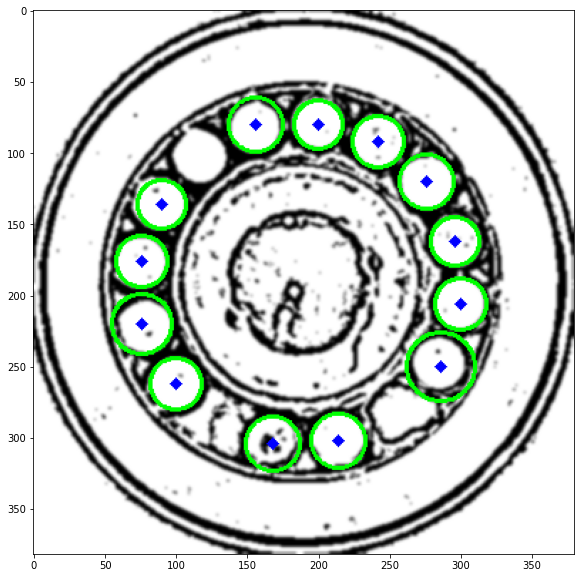

In [327]:
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#img = cv2.medianBlur(im_th,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
#edges = cv2.Canny(img,20,80,apertureSize = 3)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1= 50,param2=30,minRadius=5,maxRadius=25)

circles = np.uint16(np.around(circles))
print(f'Circle count: {len(circles[0,:])}')
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

fig = plt.figure(figsize=(10,10))
plt.imshow(cimg)